# Лабораторная работа #5
## Выполнили Смирнов Егор и Максимов Артем

В этой лабораторной нашей задачей былп работа с датасетом из написанных английских букв. Первым делом мы построили простенькую нейронную сеть с 2-3 скрытыми слоями.


In [8]:
import numpy as np
import tensorflow as tf

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D

import pandas as pd
train = pd.read_csv('../input/train.csv', header = None)

y_train = train.iloc[:, 0:1].copy()
x_train = train.iloc[:, 1:785].copy()

test = pd.read_csv('../input/test.csv', header = None)

y_test = test.iloc[:, 0:1].copy()
x_test = test.iloc[:, 1:785].copy()

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = x_train.values.reshape((-1, 784))
x_test = x_test.values.reshape((-1, 784))

N, M = x_train.shape
O = 1024
P = 512
T = 27
batch_size = 100
learning_rate = 0.001
training_epochs = 50

model = Sequential()

model.add(Dense(P))
model.add(Dropout(rate = 0.3))
model.add(Activation('relu'))

model.add(Dense(P))
model.add(Dropout(rate = 0.3))
model.add(Activation('relu'))

model.add(Dense(T, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=training_epochs, batch_size=batch_size)
score = model.evaluate(x_test, y_test, batch_size=batch_size)
print(score)

Epoch 1/50
65000/65000 [==============================] - 6s 90us/step - loss: 0.9262 - acc: 0.7209
Epoch 2/50
65000/65000 [==============================] - 5s 84us/step - loss: 0.5059 - acc: 0.8407
Epoch 3/50
65000/65000 [==============================] - 5s 84us/step - loss: 0.4140 - acc: 0.8674
Epoch 4/50
65000/65000 [==============================] - 5s 84us/step - loss: 0.3620 - acc: 0.8802
Epoch 5/50
65000/65000 [==============================] - 5s 82us/step - loss: 0.3266 - acc: 0.8910
Epoch 6/50
65000/65000 [==============================] - 5s 81us/step - loss: 0.2968 - acc: 0.8996
Epoch 7/50
65000/65000 [==============================] - 5s 82us/step - loss: 0.2831 - acc: 0.9028
Epoch 8/50
65000/65000 [==============================] - 5s 82us/step - loss: 0.2639 - acc: 0.9088
Epoch 9/50
65000/65000 [==============================] - 5s 82us/step - loss: 0.2485 - acc: 0.9136
Epoch 10/50
65000/65000 [==============================] - 5s 80us/step - loss: 0.2399 - acc: 0.9162

Значение score = 0.917. Это довольно маленькая точность на тестовых данных

В данном случае мы взяли 2 обычных плотных слоя, после каждого делается дропаут трети нейронов(для предотвращения переобучения). Функцией активации является ReLU, тк она дает лучшие результаты среди всех запусков, которые мы делали

Количество нейронов на обоих внутренних слоях выбрано одинаковым и равным 512 потому что это дало лучшие результаты в ходе тестирования. Большие значения увеличивали время работы, не давая прироста по значению score

Попробуем сеть с 3 скрытыми слоями

In [9]:
import numpy as np
import tensorflow as tf

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten

import pandas as pd
train = pd.read_csv('../input/train.csv', header = None)

y_train = train.iloc[:, 0:1].copy()
x_train = train.iloc[:, 1:785].copy()

test = pd.read_csv('../input/test.csv', header = None)

y_test = test.iloc[:, 0:1].copy()
x_test = test.iloc[:, 1:785].copy()

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.


x_train = x_train.values.reshape(x_train.shape[0],28,28,1)
x_test = x_test.values.reshape(x_test.shape[0],28,28,1)

O = 1024
P = 512
T = 27
batch_size = 100
learning_rate = 0.001
training_epochs = 50

model = Sequential()

model.add(Conv2D(96, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(P))
model.add(Dropout(rate = 0.3))
model.add(Activation('relu'))

model.add(Dense(P))
model.add(Dropout(rate = 0.3))
model.add(Activation('relu'))

model.add(Dense(T, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=training_epochs, batch_size=batch_size)
score = model.evaluate(x_test, y_test, batch_size=batch_size)
print(score)

Epoch 1/50
65000/65000 [==============================] - 17s 266us/step - loss: 0.8822 - acc: 0.7302
Epoch 2/50
65000/65000 [==============================] - 16s 252us/step - loss: 0.4128 - acc: 0.8648
Epoch 3/50
65000/65000 [==============================] - 17s 255us/step - loss: 0.3256 - acc: 0.8919
Epoch 4/50
65000/65000 [==============================] - 17s 255us/step - loss: 0.2739 - acc: 0.9065
Epoch 5/50
65000/65000 [==============================] - 16s 248us/step - loss: 0.2391 - acc: 0.9180
Epoch 6/50
65000/65000 [==============================] - 16s 244us/step - loss: 0.2174 - acc: 0.9241
Epoch 7/50
65000/65000 [==============================] - 17s 256us/step - loss: 0.1961 - acc: 0.9300
Epoch 8/50
65000/65000 [==============================] - 17s 257us/step - loss: 0.1800 - acc: 0.9350
Epoch 9/50
65000/65000 [==============================] - 17s 255us/step - loss: 0.1640 - acc: 0.9402
Epoch 10/50
65000/65000 [==============================] - 16s 247us/step - loss: 

Результат score = 0.92 получше, чем был

Здесь,1м скрытым слоем является сверточный слой с размером ядра 3х3 пикселя. Затем с помощью MaxPolling2D мы уменьшили размерность и сделали дропаут трети нейронов. После, выровняли данные, чтобы пропустить их еще через 2 плотных слоя

Идея, связанная с количеством нейронов в слоях та же, что и в сети выше

Однако 95% таким образом не выбить. Поэтому мы еще добавили еще слоев

# Модель с точностью больше 0.95

In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten

import pandas as pd
train = pd.read_csv('../input/train.csv', header = None)

y_train = train.iloc[:, 0:1].copy()
x_train = train.iloc[:, 1:785].copy()

test = pd.read_csv('../input/test.csv', header = None)

y_test = test.iloc[:, 0:1].copy()
x_test = test.iloc[:, 1:785].copy()

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = x_train.values.reshape(x_train.shape[0],28,28,1)
x_test = x_test.values.reshape(x_test.shape[0],28,28,1)

batch_size = 100
learning_rate = 0.001
training_epochs = 50

from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir = './logs', write_graph = True)

model = Sequential()
model.add(Conv2D(96, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(96, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(27, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=learning_rate, amsgrad=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=training_epochs, batch_size=batch_size, callbacks = [tensorboard])

score = model.evaluate(x_test, y_test, batch_size=batch_size)
print(score)

Using TensorFlow backend.


Epoch 1/50
65000/65000 [==============================] - 17s 262us/step - loss: 1.0358 - acc: 0.6867
Epoch 2/50
65000/65000 [==============================] - 14s 220us/step - loss: 0.4357 - acc: 0.8590
Epoch 3/50
65000/65000 [==============================] - 14s 221us/step - loss: 0.3504 - acc: 0.8866
Epoch 4/50
65000/65000 [==============================] - 14s 222us/step - loss: 0.3039 - acc: 0.8990
Epoch 5/50
65000/65000 [==============================] - 14s 221us/step - loss: 0.2791 - acc: 0.9069
Epoch 6/50
65000/65000 [==============================] - 14s 218us/step - loss: 0.2610 - acc: 0.9123
Epoch 7/50
65000/65000 [==============================] - 14s 213us/step - loss: 0.2480 - acc: 0.9172
Epoch 8/50
65000/65000 [==============================] - 14s 212us/step - loss: 0.2360 - acc: 0.9194
Epoch 9/50
65000/65000 [==============================] - 14s 213us/step - loss: 0.2257 - acc: 0.9237
Epoch 10/50
65000/65000 [==============================] - 14s 212us/step - loss: 

Через раз модель то обучается до 0.95, то остается на 0.9495-0.9499. Ниже приведен код для "дообучения" до 0.95 на тестовых данных


In [2]:
while(score[1]<0.95):
    history = model.fit(x_train, y_train,
    batch_size=batch_size,
    epochs=1,
    verbose=0,
    callbacks = [tensorboard])
    score = model.evaluate(x_test, y_test, verbose=0)
print(score)

[0.15239757174769272, 0.9502307717616741]


Воспользуемся колбеком tensorboard, чтобы посмотреть как росла accuracy и падала loss:

In [ ]:
!tensorboard --logdir=./logs

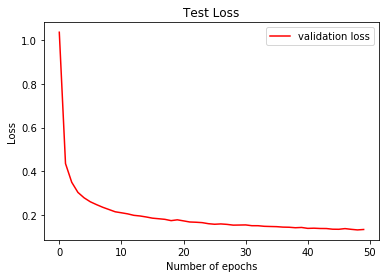

In [3]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='r', label= "validation loss")
plt.title("Test Loss")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



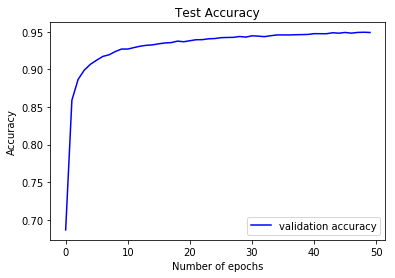

In [4]:
plt.plot(history.history['acc'], color='b', label= "validation accuracy")
plt.title("Test Accuracy")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



Исходя из результатов именно эта модель выбрана лучшей и продолжать работать мы будем с ней.

Построим схему нейронки с помощью модуля SVG:

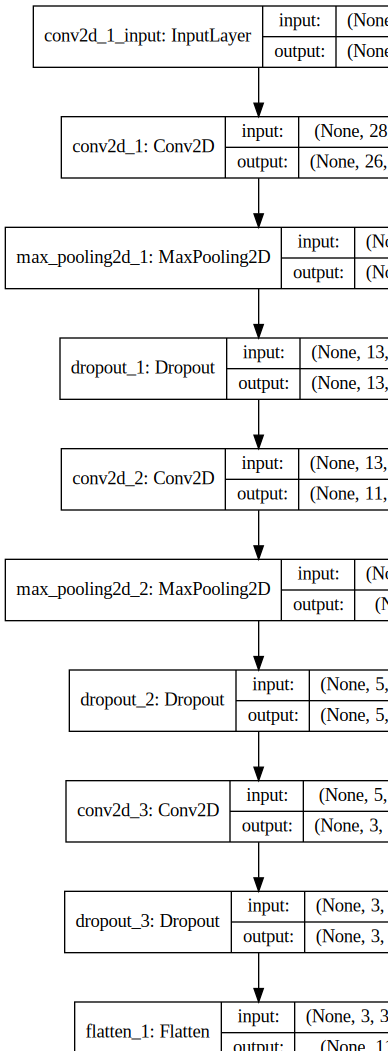

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes = True).create(prog = 'dot', format = 'svg'))

Дальше мы построили матрицу смежности для всех букв:

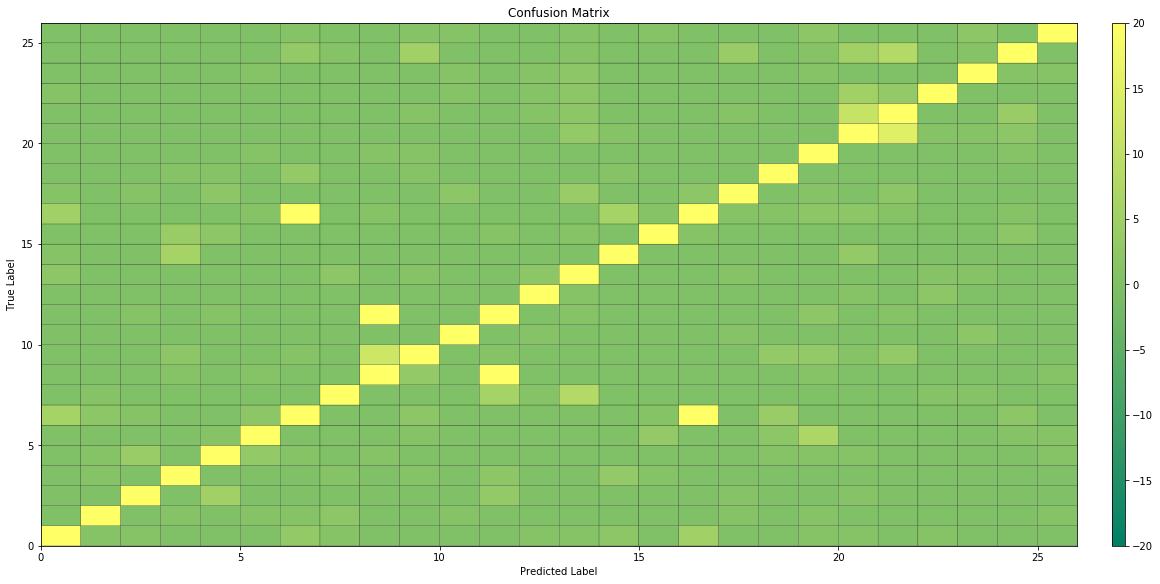

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.cm as cm

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

fig,ax = plt.subplots(figsize=(16,8), constrained_layout = True)
im = ax.pcolor(confusion_mtx, cmap=cm.summer, edgecolors='k', vmin=-20, vmax=20, linewidths=0.2)

#sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, linecolor="Green", fmt='.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
fig.colorbar(im, ax = ax, aspect=80)
plt.show()

In [ ]:
#нужны примеры картинок

 Среди букв, которые часто путаются между собой, можно выделить пары: 

- q - g
- v - u
- l - i
- j - i
- q - a
- g - a
- y - v
- r - n
- q - o
- o - d

Эти пары букв легко спутать, тк все они отличаются какой-то мелочью, например, "q" и "g" отличабтся лишь хвостиком, "v" и "u" изгибом буквы, а "l" и "i" точкой над "i". В остальных парах ситуация аналогична, поэтому неудвительно, что сеть путает эти буквы - при плохом написании их будет сложно отличить и обычному человеку

 Рассмотрим насколько равномерно обучилась наша модель. Для этого найдем процентное отношение количества ошибок для каждой буквы к общему количеству ошибок

,0
count,26.000000
mean,3.846154
std,4.883362
min,0.772798
25%,1.236476
50%,1.931994
75%,4.018547
max,20.401855


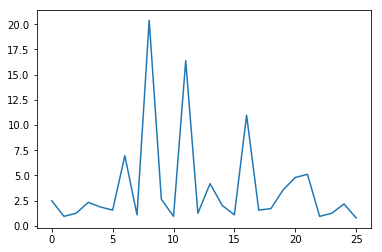

In [7]:
args = np.zeros(26)

for i in range (y_test.shape[0]):
    x = x_test[i].reshape(1,28,28,1)
    y = np.argmax(model.predict(x))
    if np.argmax(y_test[i]) != y:
        args[y - 1] += 1
        
args = args*100/sum(args)

plt.plot(range(26), args)
pd.DataFrame(data=100*args/sum(args)).describe()

Как мы видим, есть несколько пиков - модель обучилась неравномерно и на каких-то буквах система ошибается чаще.

Максимальная ошибка соответсвует 8 букве - "h". Это произошло из-за того, что ее можно написать так криво, что она будет похоже и на "n", и даже на "b".
Процент детекции: 

Минимальная ошибка соответсвует букве "z". Это можно объяснить тем, что ни одна буква не пишется похожим на "z" образом. Это заметно и на матрице смежности.
Процент детекции:

Рассмoтрим 1е буквы наших фамилий - "S" и "М".


# Цветовая карта:

In [ ]:
plt.imshow(x_train[7].T.reshape((28, 28)), cmap='gray')
plt.show()

x = x_train[7].reshape(1,28,28,1)
y = np.argmax(model.predict(x))

def shit(s):
    print(chr(ord('a') + s - 1))

shit(np.argmax(y_train[7]))

shit(y)

# Творческое задание